## Data points its on a line

here is a small example that show how a set of data points can be interpreted as a line.

$Y_i \tilde{} \mathcal{N}(w^Tx_i|\mu,\,\sigma^{2}) $ 

where we assume that $y_i = w_0 + w_1x_i+\epsilon$ and $\epsilon \tilde{} \mathcal{N}(0, \sigma^2) $

$ Y$


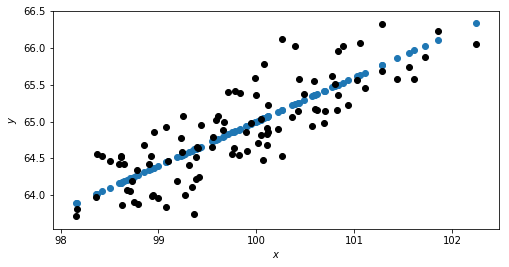

In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2017)
n=100

sigma = 0.4
epsilon = np.random.normal(0,sigma,n)
x = np.random.normal(100,1,n)
w0 = 5
w1=0.6

y = w0+w1*x
y_noisy = y+epsilon

plt.figure(figsize=(8,4))

plt.scatter(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.scatter(x, y_noisy, c="k")
plt.show()


## Bayesian Linear Regression

<!--
see: https://www.youtube.com/watch?v=HJSNb4GyiE8&list=PLD0F06AA0D2E8FFBA&index=58

see: https://github.com/zjost/bayesian-linear-regression/blob/master/src/bayes-regression.ipynb

see: https://books.google.co.uk/books?id=t6PcDgAAQBAJ&pg=PA92&lpg=PA92&dq=kevin+murphy+bayesian+linear+regression+python+implementation&source=bl&ots=xLH4Nm0GZ2&sig=LeKj-qrwGZYJ8jkaoadvz9cZQF8&hl=en&sa=X&ved=0ahUKEwiWjsbJmcPWAhUlCsAKHakZCaUQ6AEINDAC#v=onepage&q=kevin%20murphy%20bayesian%20linear%20regression%20python%20implementation&f=false

see: http://nbviewer.jupyter.org/github/tfolkman/learningwithdata/blob/master/Bayes_Primer.ipynb

see: https://gist.github.com/govg/c1beefb2e56ca7e802d9f8706cd727a5
-->



$Y \tilde{} \mathcal{N}(\mu,\,\sigma^{2}) $



$D=((x_1,y_1),(x_1,y_1),(x_1,y_1),(x_1,y_1)...(x_n,y_n))$

$Y_1,Y_2 independent$

assume that ** $\sigma$ ** is known,

$Y_i \tilde{} \mathcal{N}(w^Tx_i,\,\sigma^{2}) $ 


$\theta_{MLE} = \argmax{\theta} p(D|\theta) $

$\text{arg}\,\max\limits_{\theta} = p(D|\theta) $

$p(D|\theta) = p(y_1,y_2,...y_n) = \prod_{i=1}^{n} p(y_i|\theta) = \prod_{i=1}^{n} p( \mathcal{N}(w^Tx_i,\,\sigma^{2}) |\theta) $

$w_{MLE} = (X^TX)^{-1}X^Ty$

In [13]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import linalg 

csvFile = "./data/iris.data.csv"
csvReader = csv.DictReader(open(csvFile))
df = pd.read_csv(csvFile)
vars=['petal_len','petal_w','sepal_len','sepal_w','t_set_ver_vir']


var1 = vars[0]
var2 = vars[1]
var3 = vars[2]


x1 = np.asfarray(df[var1].values, dtype='float')
x2 = np.asfarray(df[var2].values, dtype='float')
X = np.array([x1,x2]).T
y = np.asfarray(df[var3].values, dtype='float')


class BayesianLinearRegression(object):
    pass

    def __init__(self, X, y, test_size=0.33):
        pass
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        
    def mle(self):
        X = self.X_train
        X = np.insert(X, 0, 1, axis=1) # we need to 1 in the first column to have a valid design matrix, intercept constant.
        
        y = self.y_train
        A=X.T.dot(X)
        Ainv = linalg.inv(A)
        self.Wmle = Ainv.dot(X.T.dot(y))
        return self.Wmle
    
   
    
    def predict(self):
        X = self.X_test
        X = np.insert(X, 0, 1, axis=1)
        y_hat = X.dot(self.Wmle)
        return y_hat
    
    def test(self ): #returns rmse
        self.mle() #returns tetas
        y_predict = self.predict() # multiplies X and tetas to get y_hat
        n = len(self.y_test)
        #[(y_predict[i]-y_test[i])**2 for i in range(n)]
        rmse = np.mean(np.power(y_predict - self.y_test, 2))
        return rmse

rmse = BayesianLinearRegression(X,y).test()
print (rmse)

0.165476063561


## MAP estimate in Bayesian Linear Regression


$w_{MAP} = a(aX^TX+bI)^{-1}X^Ty = (X^TX+\frac{b}{a}I)^{-1}X^Ty$

MLE: $p(D|w) \propto exp(-\frac{a}{2}(y-Xw)^T(y-Xw))$

Posterior: $ p(w|D) \propto p(D|w)p(w) \propto exp(-\frac{a}{2}(y-Xw)^T(y-Xw) - \frac{b}{2}w^Tw )$

$ p(w|D) = ay^Ty - 2aw^TX^Ty + w^T(aX^TX+bI)w$

#### we have these substitutions:

$ \wedge = aX^TX+bI$

$ aw^TX^Ty = w^T\wedge \mu$

$ aX^Ty = \wedge \mu$


$p(w|D) = \mathcal{N}(w|\mu, \wedge^{-1})$


### Map estimate of w:


$w_{MAP} = a(aX^TX+bI)^{-1}X^Ty = (X^TX+\frac{b}{a}I)^{-1}X^Ty$

$p(w|D) = \mathcal{N}((X^TX+\frac{b}{a}I)^{-1}X^Ty, (aX^TX+bI)^{-1})$

### Predictive distribution

$p(y|x,D) = \int_{}^{} p(y|x,D,w)p(w|x,D)dw = \int_{}^{} p(y|D,w)p(w|D)dw $

$p(y|x,D) = \int_{}^{} \mathcal{N}(y|w^Tx, a^{-1}) \int_{}^{} \mathcal{N}(w|\mu, \wedge^{-1})  $

$p(y|x,D) \propto \int_{}^{} exp(-\frac{a}{2}(y-w^TX)^2) exp(\frac{-1}{2}((w-\mu)^T\wedge(w-\mu))) $

#### apply substitutions

$L = aXX^T+\wedge$

$Lm = Xya + \wedge\mu $

$m = L^{-1}(ayX+\wedge\mu)$


$p(y|x,D) \propto \int_{}^{}  exp(\frac{-1}{2}( (w-m)^TL(w-m) )\,\, exp(\frac{1}{2}m^TLm - \frac{1}{2}ay^2) $

#### apply some more substitutions

$\lambda = a(1- ax^TL^{-1}X)$

$u = \frac{1}{\lambda}aX^TL^{-1}\wedge\mu = \mu^TX$

final predictive distribution:

$p(y|x,D) \propto exp(-\frac{\lambda}{2}(y-u)^2) = \mathcal{N}(y|u,\frac{1}{\lambda})$

In [55]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import linalg

csvFile = "./data/iris.data.csv"
csvReader = csv.DictReader(open(csvFile))
df = pd.read_csv(csvFile)
vars=['petal_len','petal_w','sepal_len','sepal_w','t_set_ver_vir']


var1 = vars[0]
var2 = vars[1]
var3 = vars[2]


x1 = np.asfarray(df[var1].values, dtype='float')
x2 = np.asfarray(df[var2].values, dtype='float')
X = np.array([x1,x2]).T
y = np.asfarray(df[var3].values, dtype='float')

class BayesianLinearRegressionMAP(object):
    pass

    def __init__(self, X, y, test_size=0.33):
        pass
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    #$p(w|D) = \mathcal{N}((X^TX+\frac{b}{a}I)^{-1}X^Ty, (aX^TX+bI)^{-1})$

    def map(self):
        a = 1
        b = 5
        X = self.X_train
        y = self.y_train
        
        xTx = X.T.dot(X)
        I = np.eye(xTx.shape[0])
        self.W = np.linalg.inv(xTx+(b/a)*I).dot(X.T.dot(y))
        self.Sigma = np.linalg.inv(a*xTx+b*I)
        return self.W,self.Sigma
    
   
    
    def predict(self):
        X = self.X_test
        #X = np.insert(X, 0, 1, axis=1)
        y_hat = X.dot( self.W) # we didnot add sigma value because it show the error interval. we always chose the center, namely, Y = X*W
        return y_hat

    def plot(self):
        plt.scatter(self.X_test, self.y_test, c='r')
        plt.scatter(self.X_test, self.y_hat, c='b')
        plt.show()
        
    def test(self, showPlot=False ): #returns rmse
        self.map() #returns tetas
        self.y_hat = self.predict() # multiplies X and tetas to get y_hat
        
        #print (np.array([self.y_hat, self.y_test]).T)

        n = len(self.y_test)
        #[(y_predict[i]-y_test[i])**2 for i in range(n)]
        rmse = np.mean(np.power(self.y_hat - self.y_test, 2))
        if showPlot==True:
            self.plot()
        return rmse


rmse = BayesianLinearRegressionMAP(X,y).test(showPlot=False)
print (rmse)

2.99555860955
